In [1]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,50 mins 51 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_tinke_vebwtp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.216 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


In [2]:
# Import a sample binary outcome train/test set into H2O
data = h2o.import_file("titanic_train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# Split the data into Train/Test/Validation with Train having 70% and test and validation 15% each
train,test,valid = data.split_frame(ratios=[.7, .15])

In [4]:
# Identify predictors and response
x = train.columns
y = "Survived"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |█
14:26:23.630: AutoML: XGBoost is not available; skipping it.
14:26:23.630: _train param, Dropping bad and constant columns: [Name]
14:26:23.803: _train param, Dropping bad and constant columns: [Name]
14:26:23.977: _train param, Dropping bad and constant columns: [Name]
14:26:24.340: _train param, Dropping bad and constant columns: [Name]
14:26:24.513: _train param, Dropping bad and constant columns: [Name]
14:26:24.719: _train param, Dropping bad and constant columns: [Name]
14:26:24.909: _train param, Dropping bad and constant columns: [Name]
14:26:25.258: _train param, Dropping bad and constant columns: [Name]
14:26:25.464: _train param, Dropping bad and constant columns: [Name]

██████████████████████████████████████████████████████████████| (done) 100%

14:29:25.858: _train param, Dropping unused columns: [Name]
14:29:26.456: _train param, Dropping unused columns: [Name]



model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_3_20230619_142623,0.865751,0.422381,0.825232,0.180847,0.360041,0.129629
StackedEnsemble_BestOfFamily_1_AutoML_3_20230619_142623,0.865044,0.426016,0.819594,0.184599,0.362808,0.131629
DeepLearning_grid_3_AutoML_3_20230619_142623_model_1,0.858091,0.535943,0.814337,0.198787,0.382691,0.146452
DeepLearning_grid_2_AutoML_3_20230619_142623_model_1,0.858028,0.54836,0.805982,0.195276,0.38326,0.146888
GBM_2_AutoML_3_20230619_142623,0.855907,0.442542,0.797979,0.201431,0.37281,0.138987
DeepLearning_grid_1_AutoML_3_20230619_142623_model_1,0.855769,0.476586,0.802049,0.200569,0.379135,0.143744
GBM_grid_1_AutoML_3_20230619_142623_model_2,0.853718,0.435051,0.801416,0.189214,0.367914,0.135361
GBM_3_AutoML_3_20230619_142623,0.849425,0.446118,0.799904,0.195805,0.371638,0.138114
DeepLearning_1_AutoML_3_20230619_142623,0.849316,0.459618,0.800595,0.209418,0.380715,0.144944
XRT_1_AutoML_3_20230619_142623,0.84904,0.463063,0.772094,0.202586,0.382722,0.146476


In [5]:
# Get a specific model by model ID
m = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_3_20230619_142623")

In [10]:
m.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_3_20230619_142623',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_3_20230619_142623'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230619_142623_training_py_5_sid_b151',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230619_142623_training_py_5_sid_b151'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230619_142623_training_py_5_sid_b151',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230619_142623_training_py_5_sid_b151'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_3_20230619_142623

,0,1,Error,Rate
0,70.0,9.0,0.1139,(9.0/79.0)
1,17.0,52.0,0.2464,(17.0/69.0)
Total,87.0,61.0,0.1757,(26.0/148.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

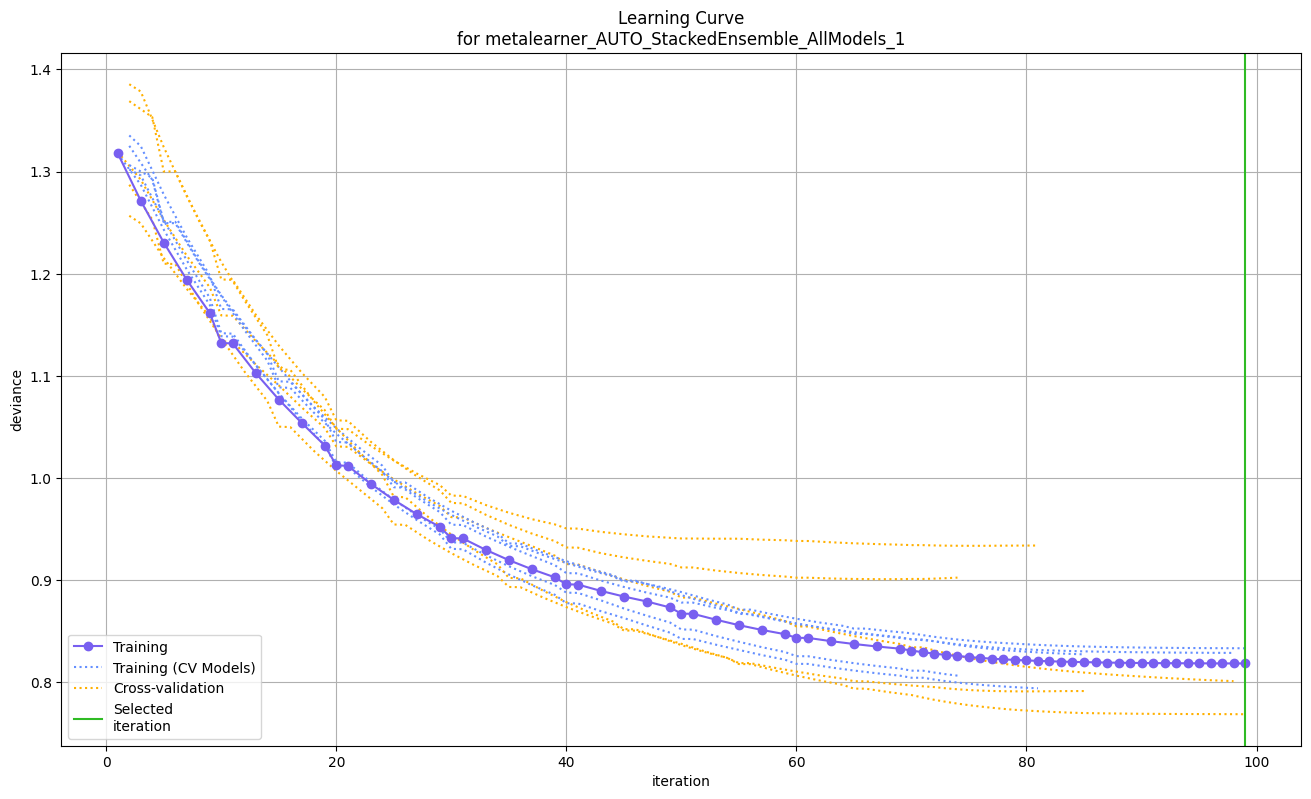

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

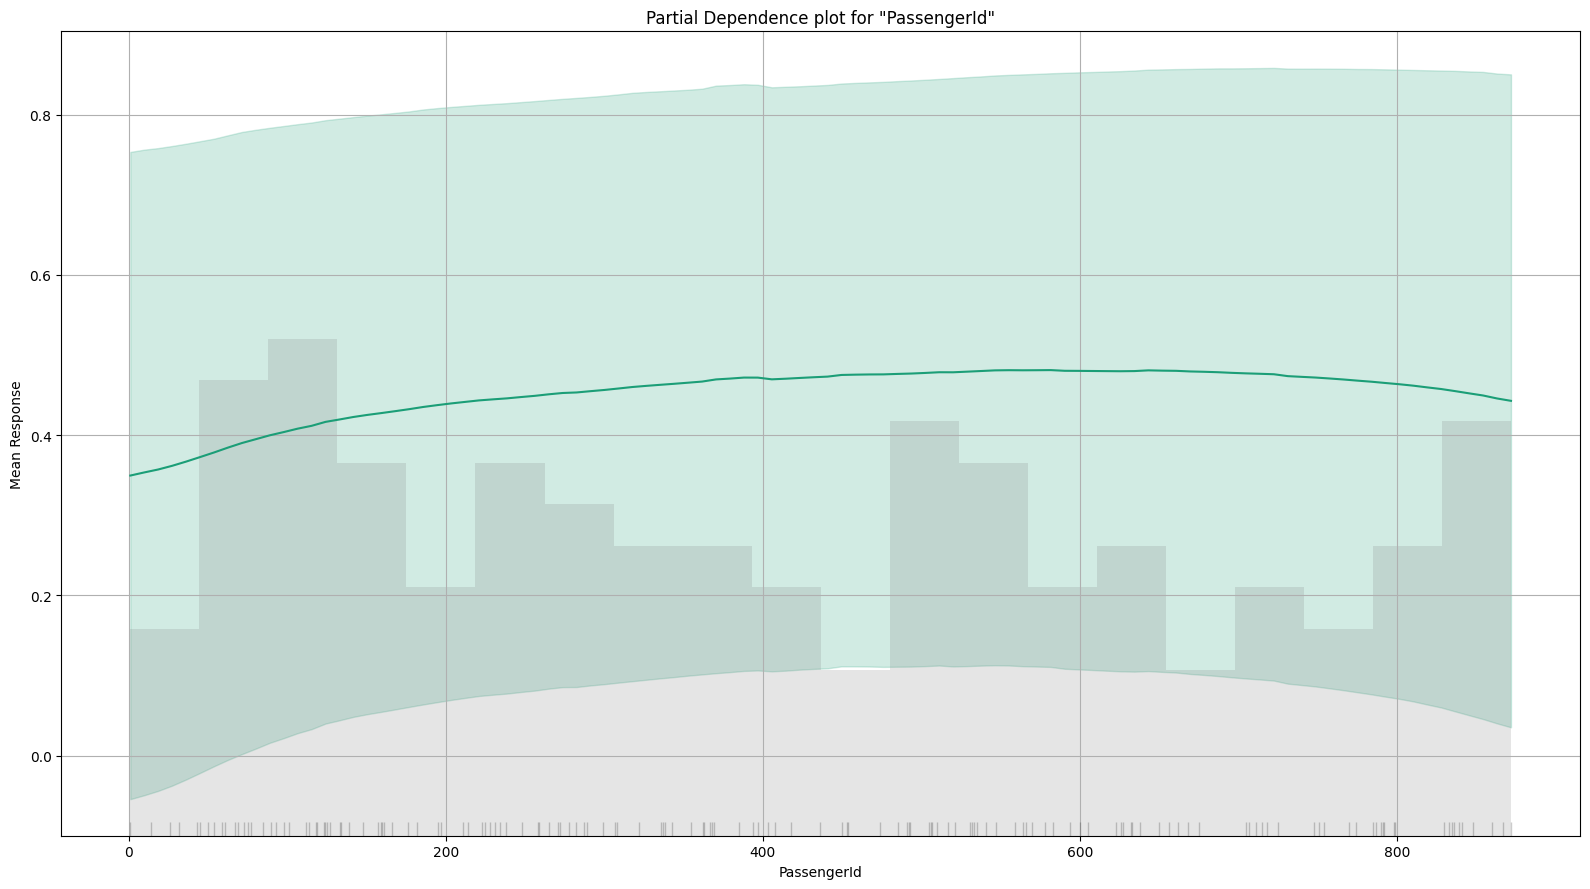

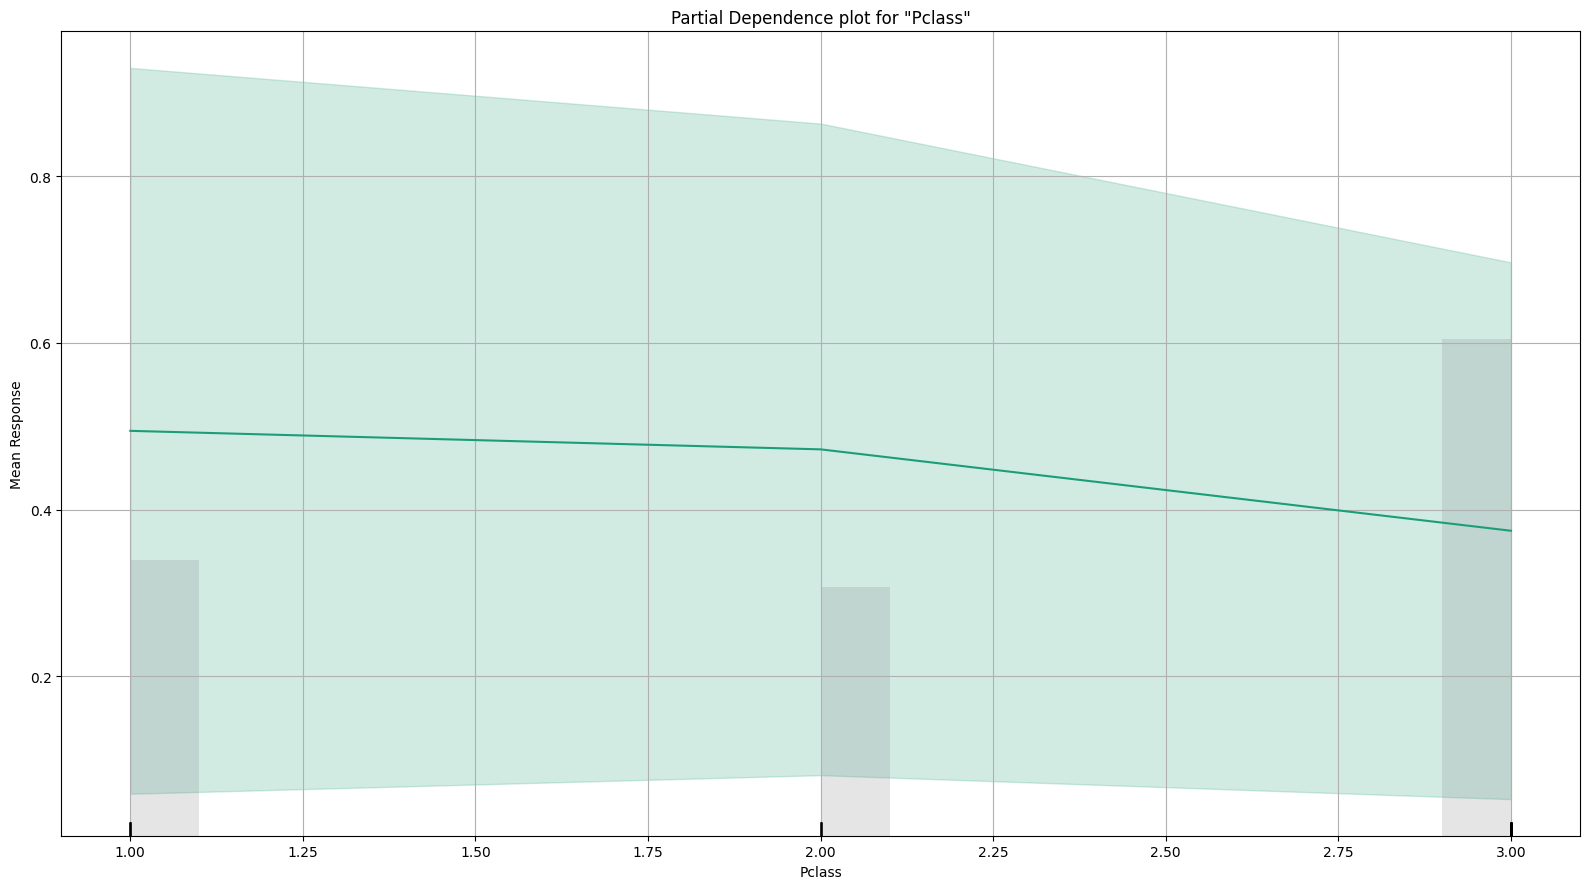

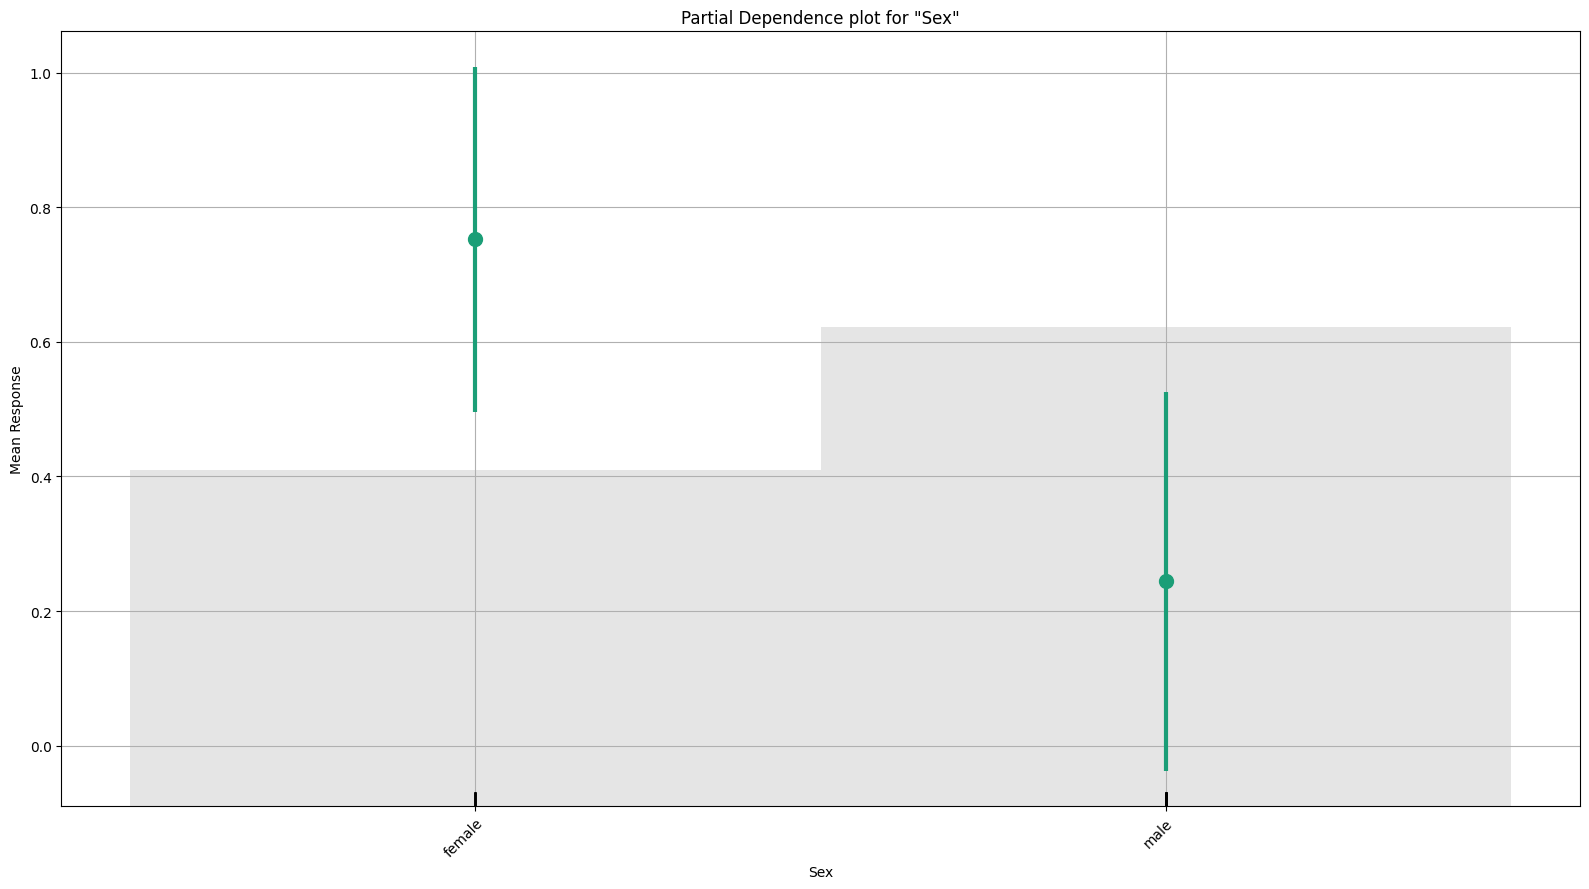

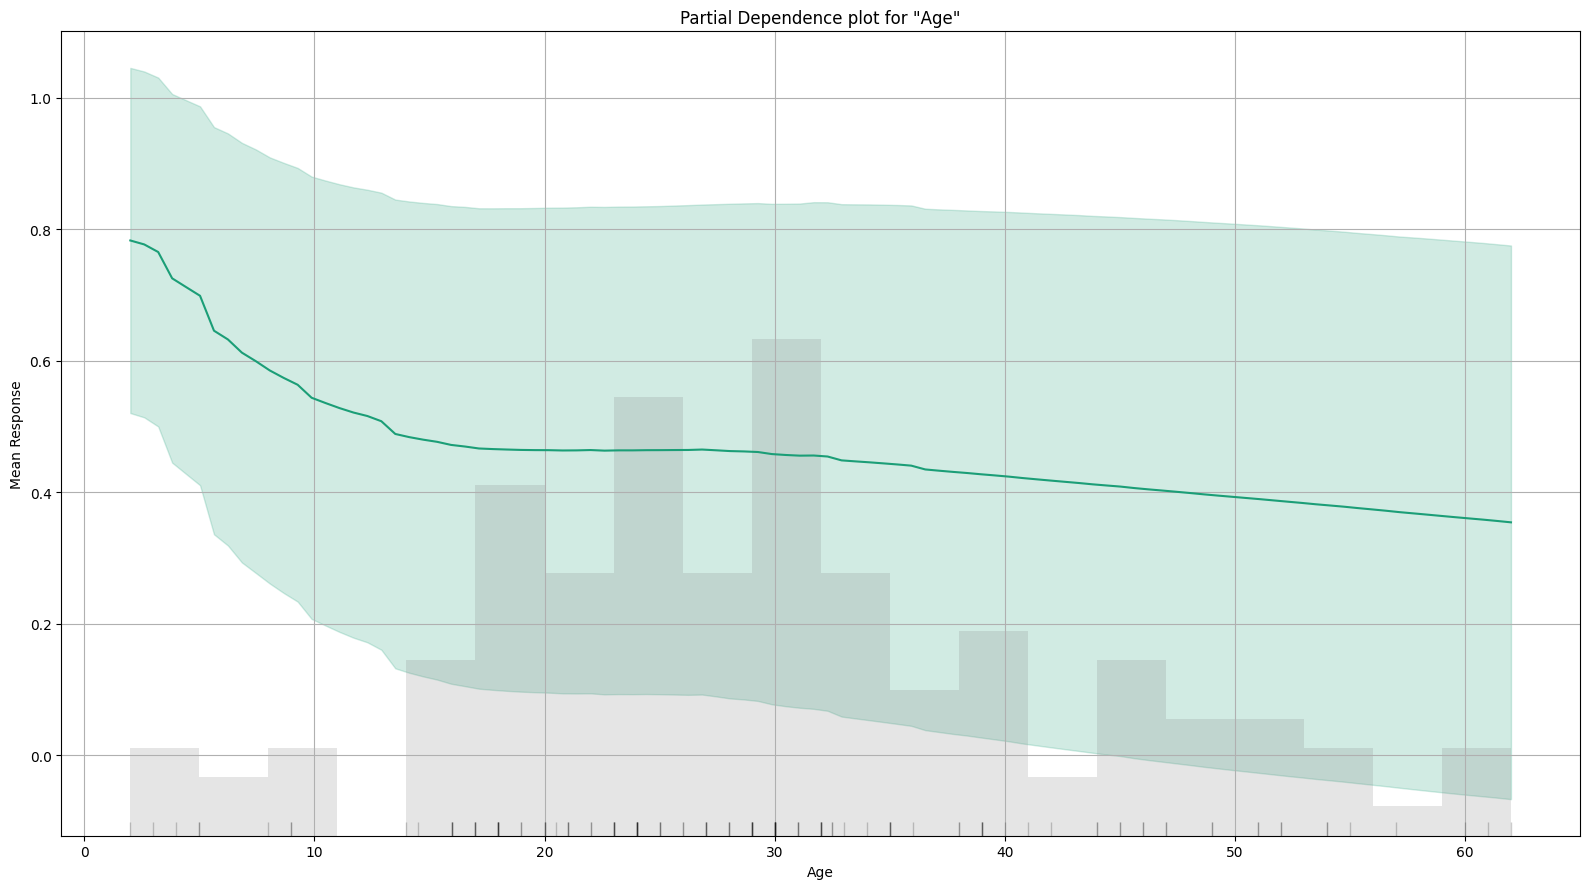

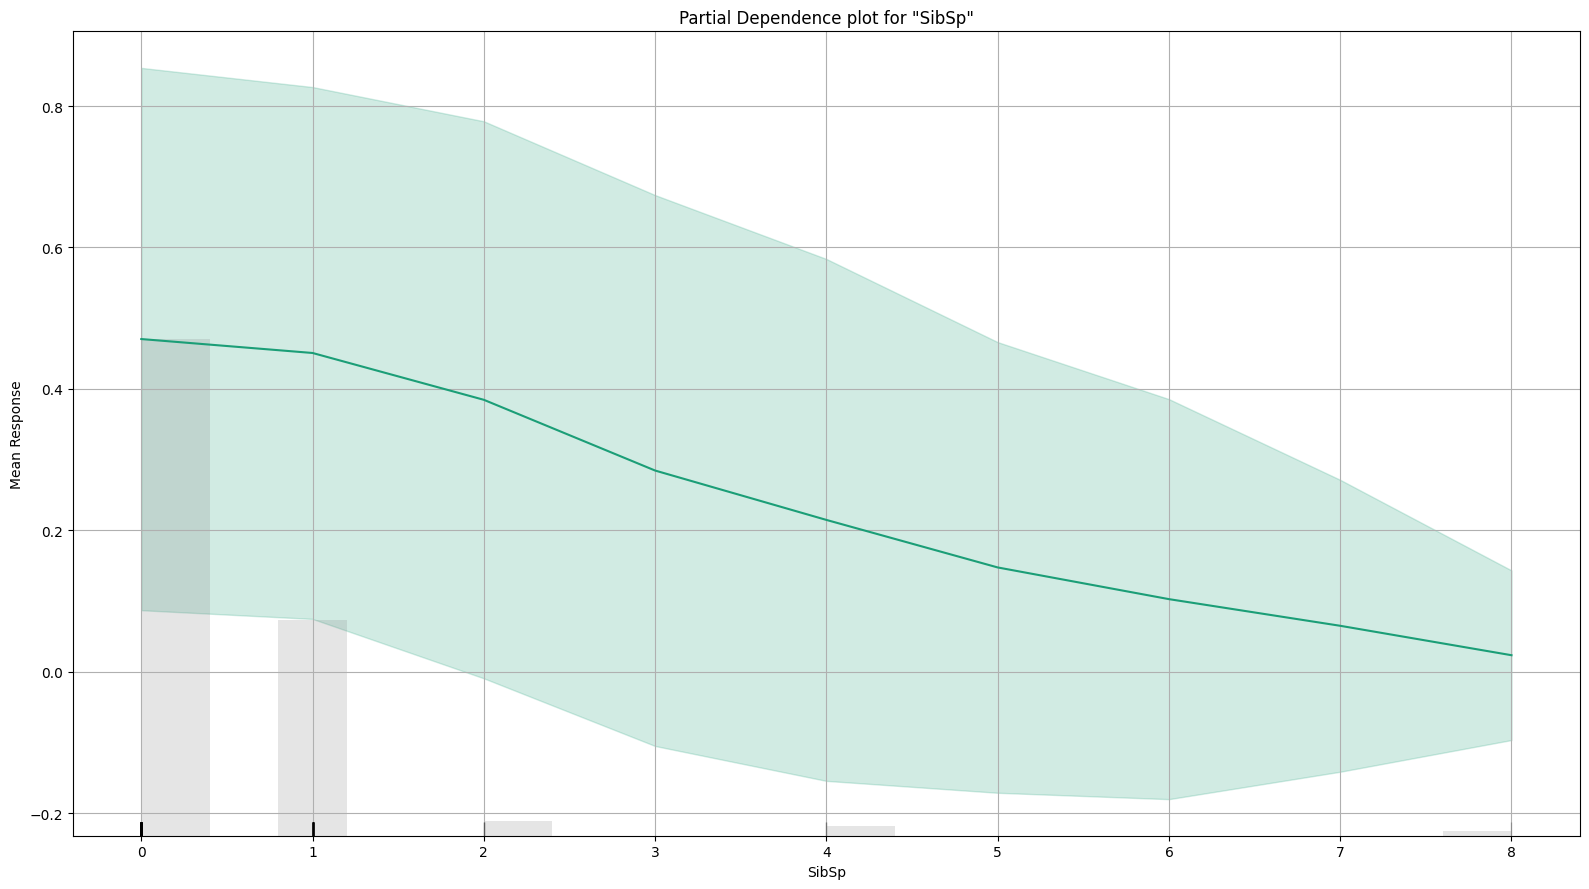

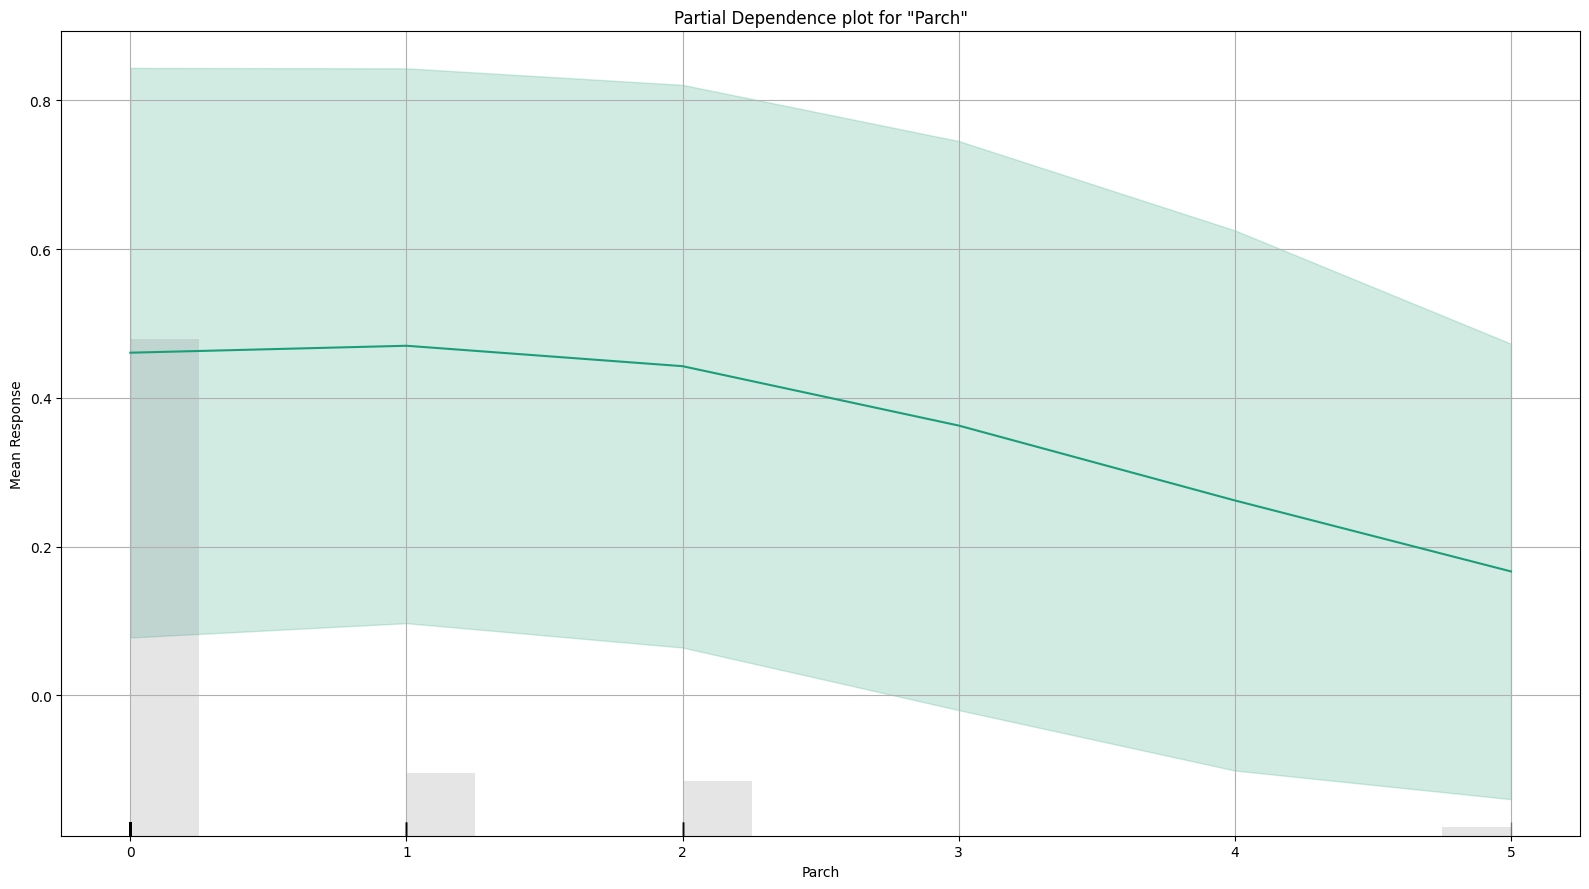

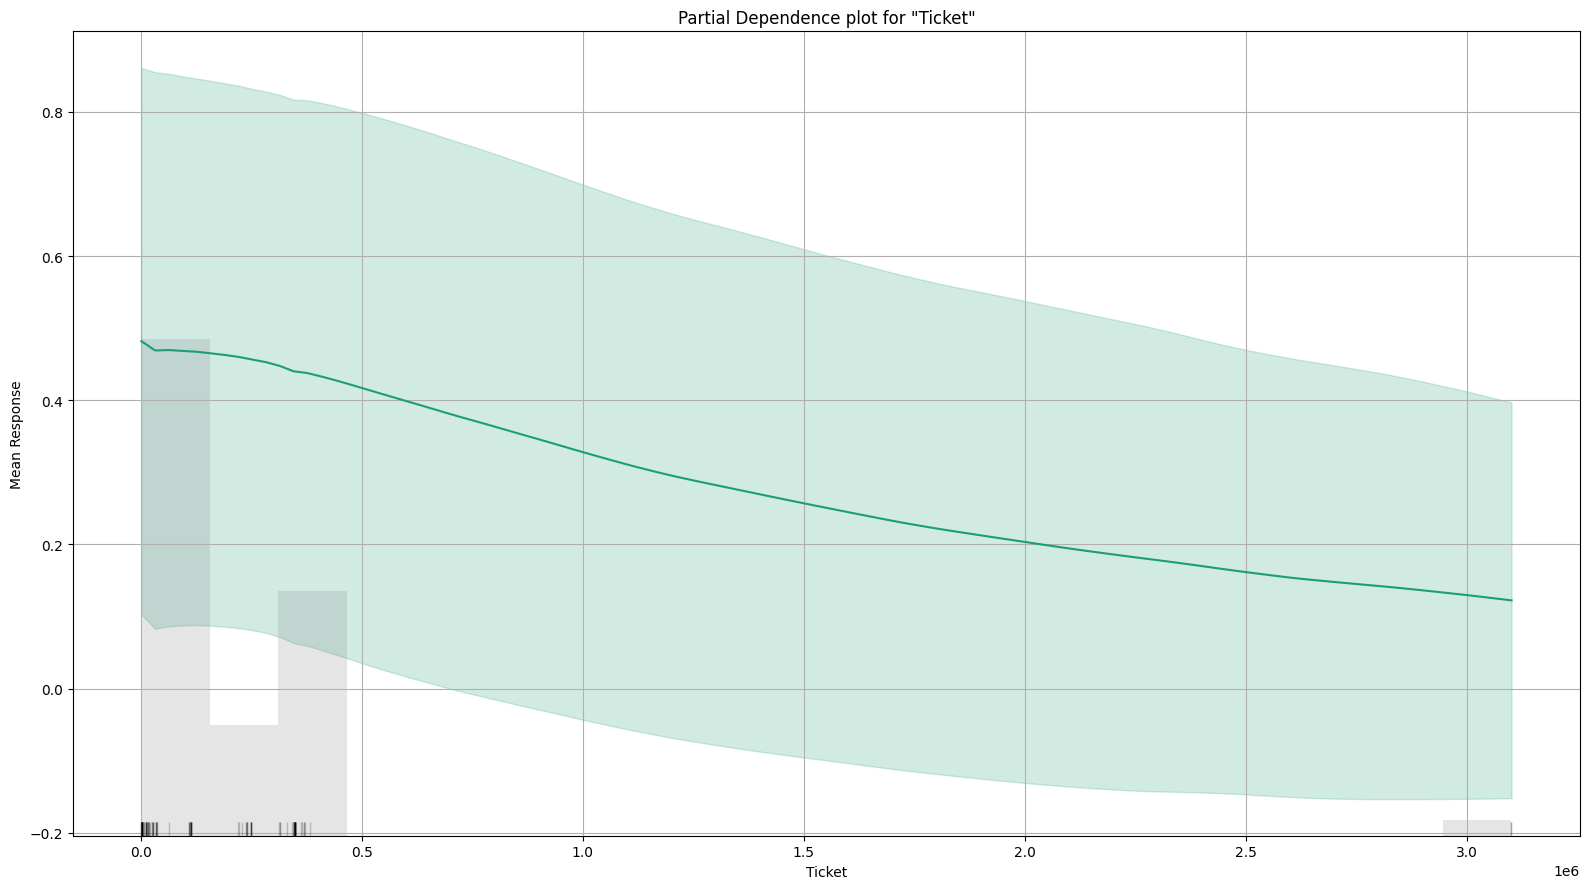

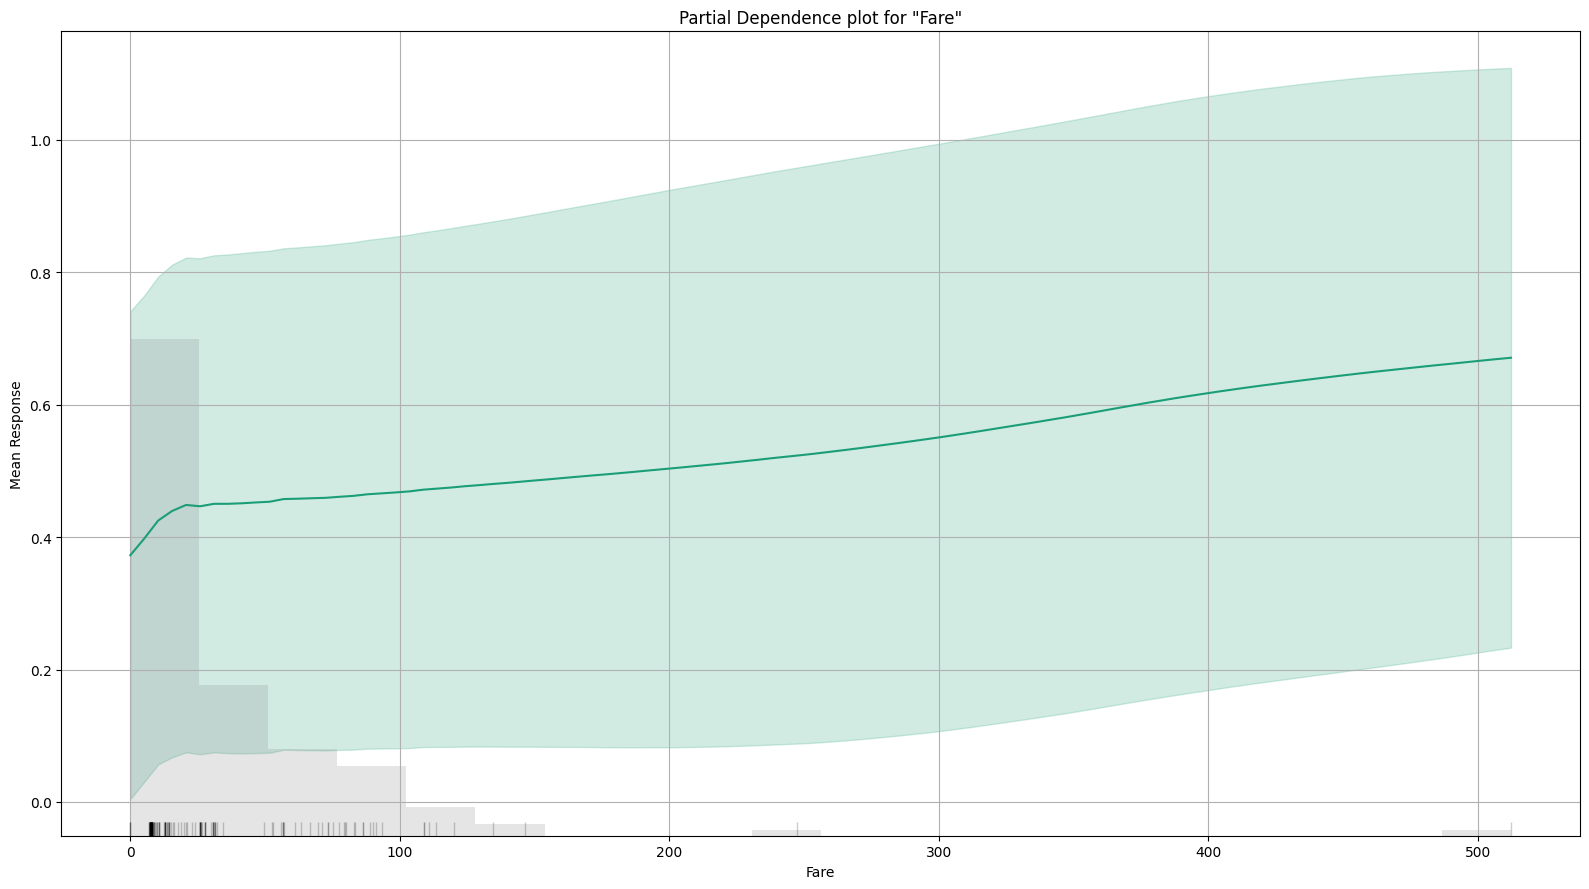

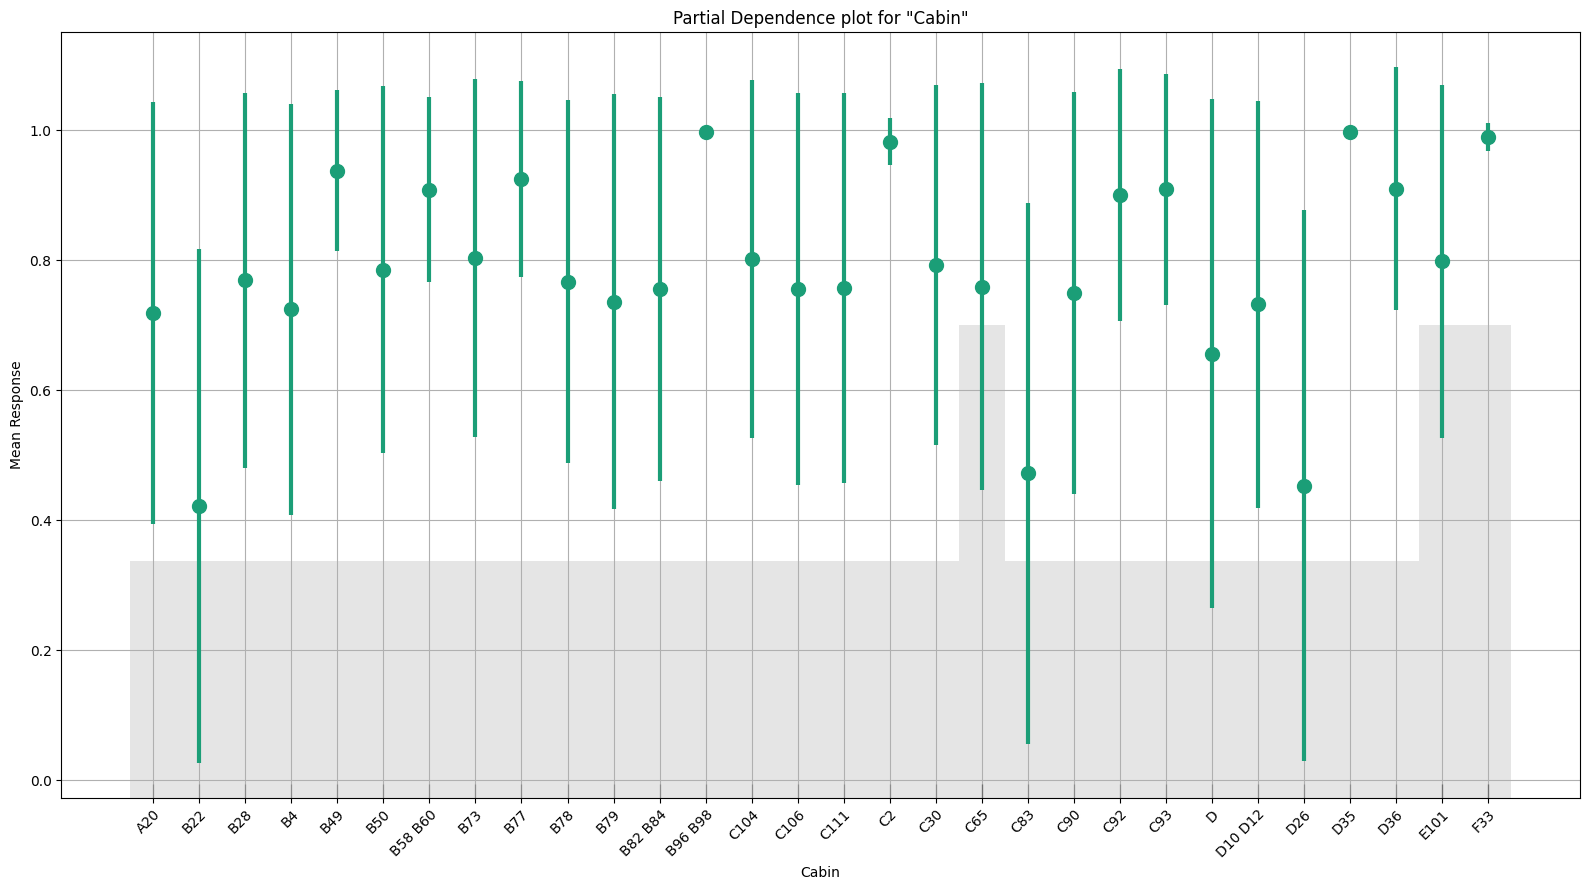

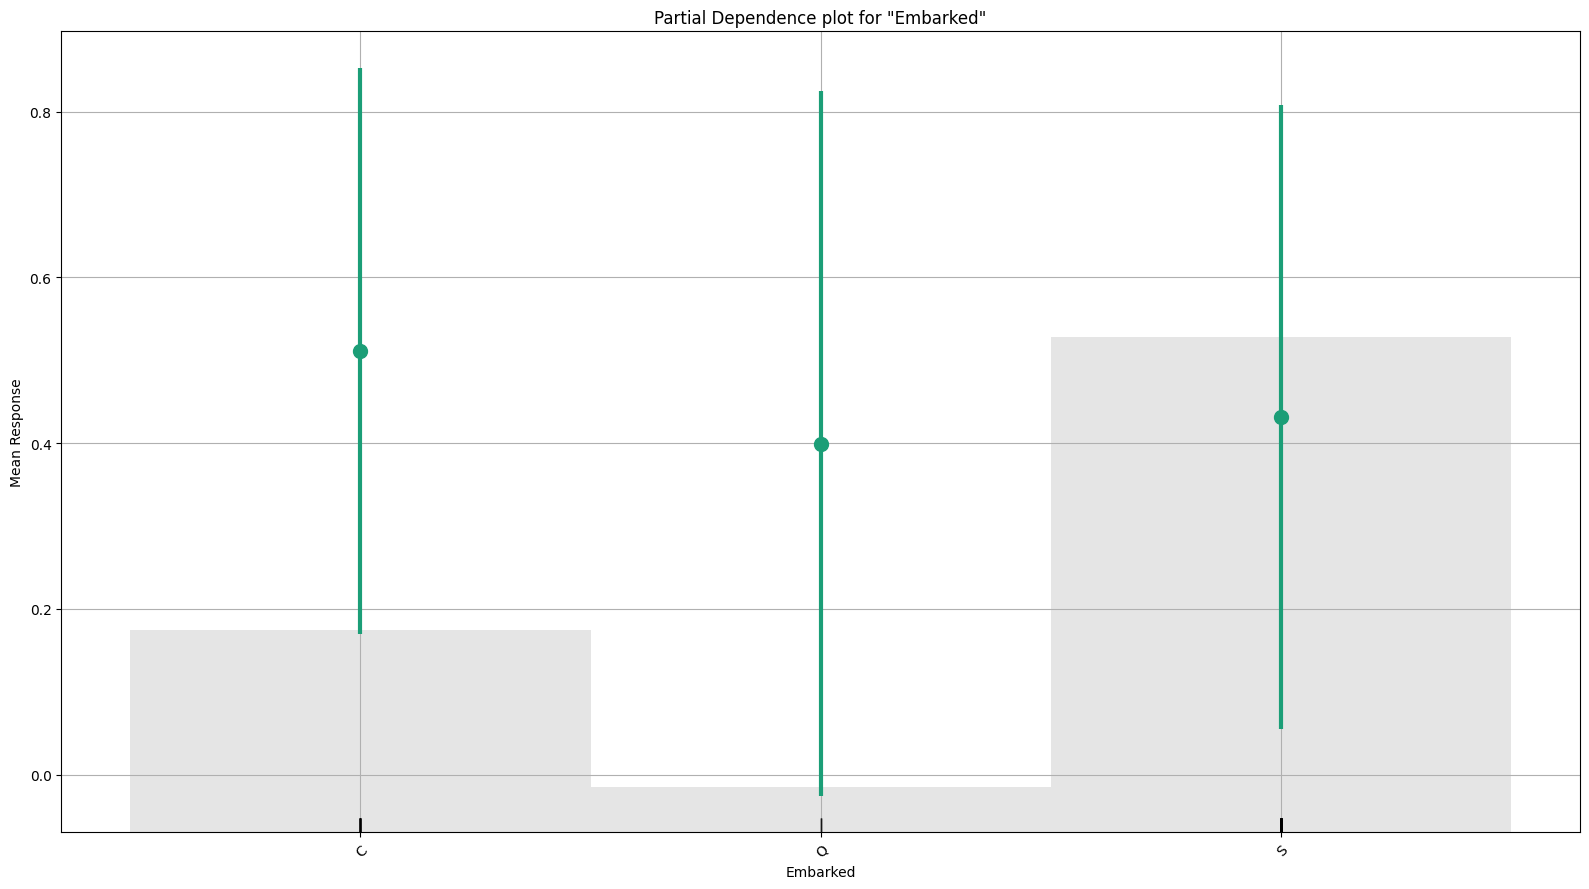

In [8]:
exm = m.explain(test)